https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb <br/>
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# DATASET

In [2]:
import pandas as pd

XTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
YTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
XTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_test_all.csv')
YTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_test_all.csv')

In [3]:
XTrain.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302',
       '2303'],
      dtype='object', length=2304)

In [4]:
XTArr=np.array(XTrain)
YTArr=np.array(YTrain) 

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
datatype = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
X1 = data.iloc[:,0:2304]  #independent columns
y1 = datatype.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScoresAll2 = featureScores.nlargest(2,'Score')
featureScoresAll2

,Specs,Score
1263,1263,150633.369191
1264,1264,148051.674998


In [6]:
def get_best_feature_dataframe(index_X, data):
    arr = index_X.to_numpy()[:,0]    
    return data.loc[:,arr]

In [7]:
feature_df = get_best_feature_dataframe(featureScoresAll2,XTrain)
XTArrBest  = feature_df.to_numpy()
XTest.shape

(3090, 2304)

In [8]:
feature_df1 = get_best_feature_dataframe(featureScoresAll2,XTest)
XTestArrBest  = feature_df1.to_numpy()
XTestArrBest.shape

(3090, 2)

# Training and visualizing

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [10]:
X = XTArrBest # petal length and width
y = YTrain

# Decision Tree without Optimization

In [11]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",random_state=50)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.32232542139662884



(process:11296): GLib-GIO-WARNING **: 17:48:29.111: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.719.200_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:11296): GLib-GIO-WARNING **: 17:48:29.847: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:11296): GLib-GIO-WARNING **: 17:48:29.866: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.49.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0811283 to fit


(process:20852): GLib-GIO-WARNING **: 17:48:43.297: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.719.200_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') sup

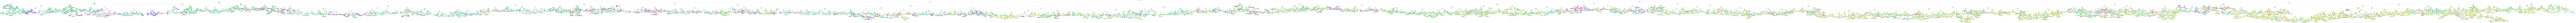

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
feature_cols = ['Feature 1', 'Feature 2']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('traffic.png')
Image(graph.create_png())


# Optimized Decision Tree

In [12]:
# Create Decision Tree classifer object
tree_clf = DecisionTreeClassifier(criterion="entropy",max_depth=2, random_state=50)

# Train Decision Tree Classifer
tree_clf = tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = tree_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


Accuracy: 0.33298933608531134


# Plotting with Entropy

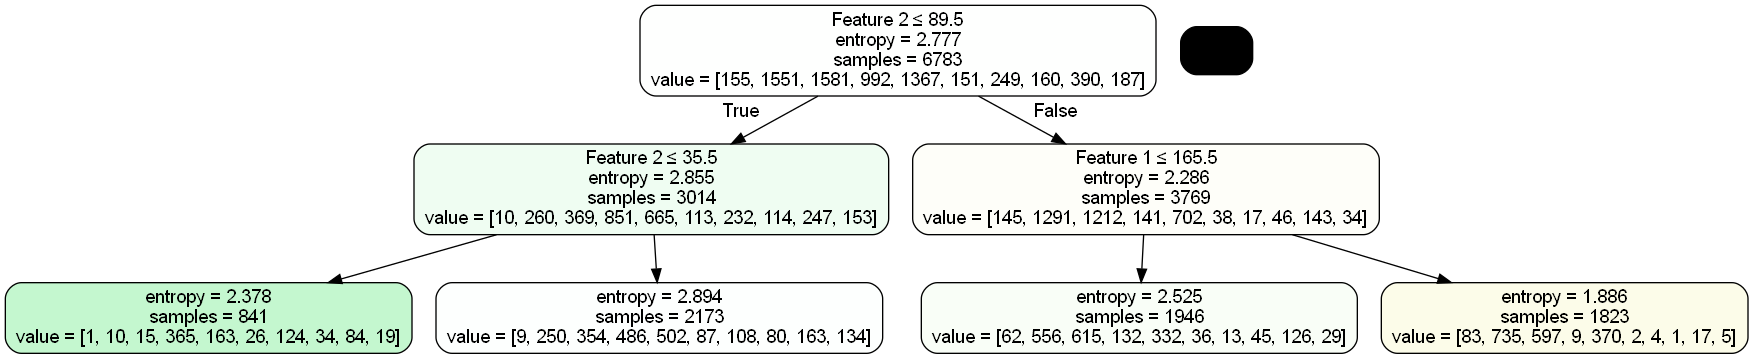

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
feature_cols = ['Feature 1', 'Feature 2']
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('traffic2_entropy.png')
Image(graph.create_png())

# Plotting with Gini

Accuracy: 0.3453732370141039


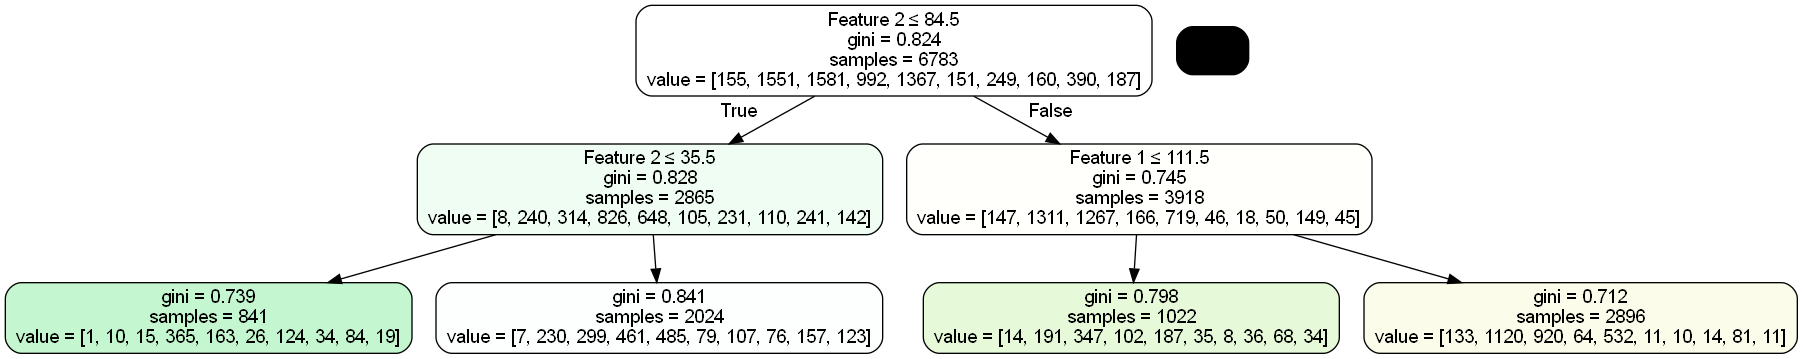

In [15]:
# Create Decision Tree classifer object
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=50)

# Train Decision Tree Classifer
tree_clf = tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = tree_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('traffic2_gini.png')
Image(graph.create_png())

A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0.  For example, the depth-2 left node has a gini score equal to 1 – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168. Another impurity measure is information gain (entropy)
.
Equation 6-1. Gini impurity of node n
#Gi=1− ∑p<i,k>^2 
• p<i,k> is the ratio of class k instances among the training instances in the ith node.

#Entropy(measuring node impurity) 
#Hi=− ∑ pi,k log2 pi,k

# J48 algorithm


In [12]:
import numpy as np
import arff

y_train_str = y_train.astype(str)

# Combine features and labels into a single NumPy array
data = np.column_stack((X_train, y_train_str))

# Get attribute names for features
feature_names = [f'attr{i+1}' for i in range(X_train.shape[1])]

# Create attribute names for the ARFF file
attributes = [(name, 'REAL') for name in feature_names] + [('class', list(map(str, np.unique(y_train))))]

# Save the ARFF file
arff_file_path = "Traffic_Sign\\CompleteDataSet\\x_train_all.arff"
with open(arff_file_path, 'w') as arff_file:
    arff.dump({
        'relation': 'my_dataset',
        'attributes': attributes,
        'data': data.tolist()
    }, arff_file)


In [23]:
import javabridge
import bioformats
import numpy as np
from weka.core.dataset import Instances
from weka.classifiers import Classifier
from weka.core.converters import Loader
from weka.core.dataset import Attribute
from weka.core.classes import Random
import weka.core.jvm as jvm
from weka.classifiers import Classifier, Evaluation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from graphviz import Source
from weka.plot.classifiers import plot_roc
from weka.plot.classifiers import plot_prc
from pydotplus import graph_from_dot_data

# Testing with Cross Validation

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Accuracy: 36.46%
True Positive Rate: 0.59
False Positive Rate: 0.26
Precision: 0.40
Recall: 0.59
F-Measure: 0.48
ROC Area: 0.74


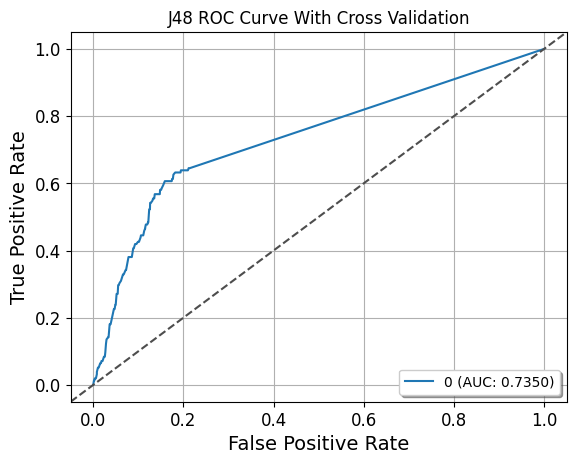

In [25]:
# Start the Java Virtual Machine with package support
jvm.start(packages=True)

# Load your ARFF file or dataset
loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("Traffic_Sign\\CompleteDataSet\\x_train_all.arff")
data.class_is_last()

# Initialize the J48 classifier
j48 = Classifier(classname="weka.classifiers.trees.J48")

# Train the classifier on the entire training set
j48.build_classifier(data)

# Evaluate the model on the training set using 10-fold cross-validation
evaluation = Evaluation(data)
evaluation.crossvalidate_model(j48, data, 10, Random(1))  # Use Random(1) for reproducibility

# Get various metrics
accuracy = evaluation.percent_correct
true_positive_rate = evaluation.true_positive_rate(1)
false_positive_rate = evaluation.false_positive_rate(1)
precision = evaluation.precision(1)
recall = evaluation.recall(1)
f_measure = evaluation.f_measure(1)
roc_area = evaluation.area_under_roc(1)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-Measure: {f_measure:.2f}")
print(f"ROC Area: {roc_area:.2f}")

plot_roc(evaluation, title="J48 ROC Curve With Cross Validation")

# Close the Java Virtual Machine
#jvm.stop()


# Generating ARFF Test File

In [29]:
import numpy as np
import arff
y_test_str = YTest.astype(str)

# Combine features and labels into a single NumPy array
data = np.column_stack((XTestArrBest, y_test_str))

# Get attribute names for features
feature_names = [f'attr{i+1}' for i in range(XTestArrBest.shape[1])]

# Create attribute names for the ARFF file
attributes = [(name, 'REAL') for name in feature_names] + [('class', list(map(str, np.unique(y_test))))]

# Save the ARFF file
arff_file_path = "Traffic_Sign\\CompleteDataSet\\y_test_all.arff"
with open(arff_file_path, 'w') as arff_file:
    arff.dump({
        'relation': 'my_dataset',
        'attributes': attributes,
        'data': data.tolist()
    }, arff_file)

# Running j48 on Test Set

Accuracy on Test Set: 38.09%
True Positive Rate: 0.57
False Positive Rate: 0.24
Precision: 0.43
Recall: 0.57
F-Measure: 0.49
ROC Area: 0.71


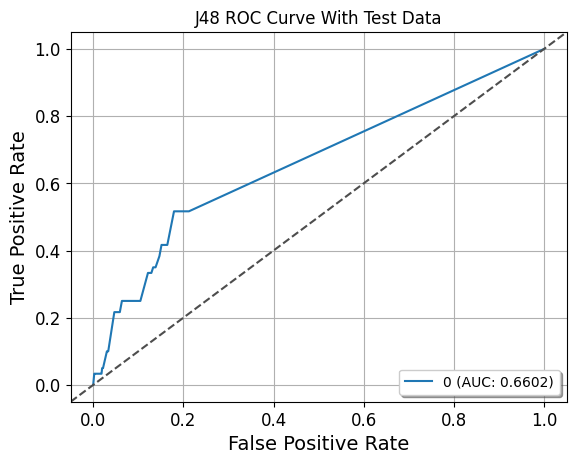

In [26]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.classifiers import Classifier
from weka.classifiers import Evaluation

# Start the Java Virtual Machine with package support
#jvm.start(packages=True)

# Load your training ARFF file
train_loader = Loader(classname="weka.core.converters.ArffLoader")
train_data = train_loader.load_file("Traffic_Sign\\CompleteDataSet\\x_train_all.arff")
train_data.class_is_last()

# Load your test ARFF file
test_loader = Loader(classname="weka.core.converters.ArffLoader")
test_data = test_loader.load_file("Traffic_Sign\\CompleteDataSet\\y_test_all.arff")
test_data.class_is_last()

# Initialize the J48 classifier
j48 = Classifier(classname="weka.classifiers.trees.J48")

# Train the classifier on the training set
j48.build_classifier(train_data)

# Evaluate the model on the test set
evaluation = Evaluation(train_data)
evaluation.test_model(j48, test_data)

# Get various metrics
accuracy = evaluation.percent_correct
true_positive_rate = evaluation.true_positive_rate(1)
false_positive_rate = evaluation.false_positive_rate(1)
precision = evaluation.precision(1)
recall = evaluation.recall(1)
f_measure = evaluation.f_measure(1)
roc_area = evaluation.area_under_roc(1)

# Print the metrics
print(f"Accuracy on Test Set: {accuracy:.2f}%")
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-Measure: {f_measure:.2f}")
print(f"ROC Area: {roc_area:.2f}")

# Close the Java Virtual Machine
#jvm.stop()

plot_roc(evaluation, title="J48 ROC Curve With Test Data")


# Regularization Hyperparameters
'U': '', # Unpruned tree
'C': '0.25', # Confidence threshold for pruning
'M': '3',       # Minimum number of instances per leaf

In [27]:
def run_j48_tree(j48_options):
    # Initialize the J48 classifier with options
    j48 = Classifier(classname="weka.classifiers.trees.J48", options=j48_options)

    # Train the classifier on the entire training set
    j48.build_classifier(data)

    # Evaluate the model using 10-fold cross-validation
    evaluation = Evaluation(data)
    evaluation.crossvalidate_model(j48, data, 10, Random(1))  # Use Random(1) for reproducibility

    # Get various metrics
    accuracy = evaluation.percent_correct
    true_positive_rate = evaluation.true_positive_rate(1)
    false_positive_rate = evaluation.false_positive_rate(1)
    precision = evaluation.precision(1)
    recall = evaluation.recall(1)
    f_measure = evaluation.f_measure(1)
    roc_area = evaluation.area_under_roc(1)

    # Print the metrics
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"True Positive Rate: {true_positive_rate:.2f}")
    print(f"False Positive Rate: {false_positive_rate:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F-Measure: {f_measure:.2f}")
    print(f"ROC Area: {roc_area:.2f}")
    
    # Plot the ROC curve
    plot_roc(evaluation, title="J48 ROC Curve")
    plot_prc(evaluation,title="J48 PRC Curve")
    
    dot_tree = j48.graph
    # Visualize the decision tree directly in the notebook
    Source(dot_tree).render("output_filename", format="png", cleanup=True)
    Image("output_filename.png")
    return dot_tree

In [29]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random

# Start the Java Virtual Machine with package support
#jvm.start(packages=True)

# Load your ARFF file
loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("Traffic_Sign\\CompleteDataSet\\x_train_all.arff")
data.class_is_last()

# Unpruned Tree

In [18]:
j48_options = ["-U"]
run_j48_tree(j48_options)

Accuracy: 35.07%
True Positive Rate: 0.56
False Positive Rate: 0.26
Precision: 0.39
Recall: 0.56
F-Measure: 0.46
ROC Area: 0.71


# Confidense Interval at 0.5

In [19]:
j48_options = ["-C", "0.50"]
run_j48_tree(j48_options)

Accuracy: 35.68%
True Positive Rate: 0.56
False Positive Rate: 0.26
Precision: 0.40
Recall: 0.56
F-Measure: 0.47
ROC Area: 0.72


# Confidense Interval at 0.1

Accuracy: 38.36%
True Positive Rate: 0.60
False Positive Rate: 0.25
Precision: 0.42
Recall: 0.60
F-Measure: 0.49
ROC Area: 0.76


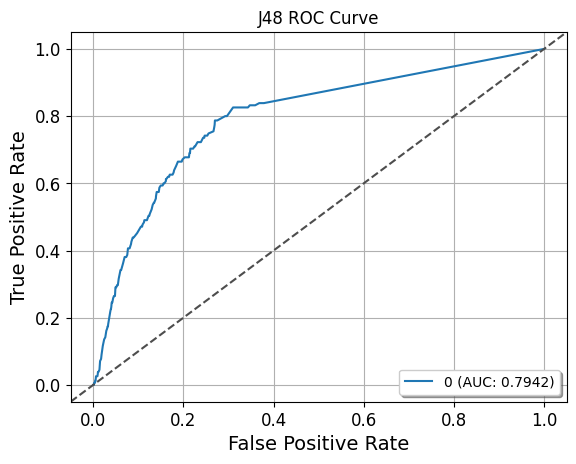

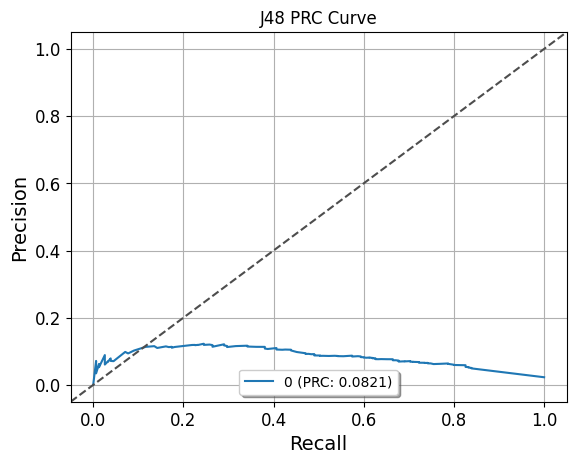

'digraph J48Tree {\nN0 [label="attr2" ]\nN0->N1 [label="<= 89"]\nN1 [label="attr2" ]\nN1->N2 [label="<= 35"]\nN2 [label="attr1" ]\nN2->N3 [label="<= 10"]\nN3 [label="attr2" ]\nN3->N4 [label="<= 12"]\nN4 [label="attr1" ]\nN4->N5 [label="<= 7"]\nN5 [label="5 (17.0/1.0)" shape=box style=filled ]\nN4->N6 [label="> 7"]\nN6 [label="attr1" ]\nN6->N7 [label="<= 8"]\nN7 [label="3 (3.0)" shape=box style=filled ]\nN6->N8 [label="> 8"]\nN8 [label="5 (11.0/4.0)" shape=box style=filled ]\nN3->N9 [label="> 12"]\nN9 [label="3 (6.0)" shape=box style=filled ]\nN2->N10 [label="> 10"]\nN10 [label="attr1" ]\nN10->N11 [label="<= 40"]\nN11 [label="attr2" ]\nN11->N12 [label="<= 23"]\nN12 [label="attr1" ]\nN12->N13 [label="<= 24"]\nN13 [label="attr2" ]\nN13->N14 [label="<= 13"]\nN14 [label="attr1" ]\nN14->N15 [label="<= 11"]\nN15 [label="4 (3.0/1.0)" shape=box style=filled ]\nN14->N16 [label="> 11"]\nN16 [label="3 (27.0/1.0)" shape=box style=filled ]\nN13->N17 [label="> 13"]\nN17 [label="attr1" ]\nN17->N18 [la

In [33]:
j48_options = ["-C", "0.1"]
run_j48_tree(j48_options)

# Controlling the leaf nodes to 3

Accuracy: 36.78%
True Positive Rate: 0.60
False Positive Rate: 0.26
Precision: 0.41
Recall: 0.60
F-Measure: 0.48
ROC Area: 0.75


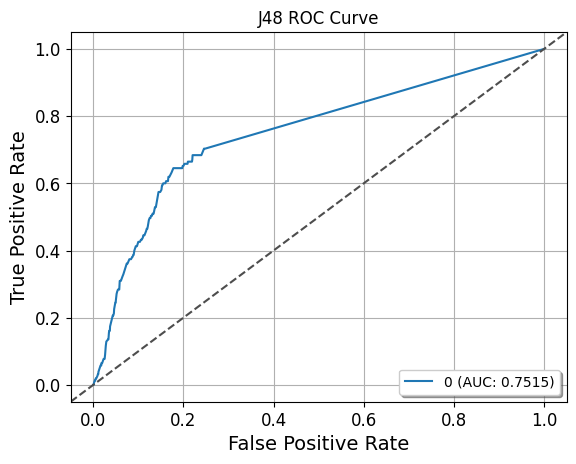

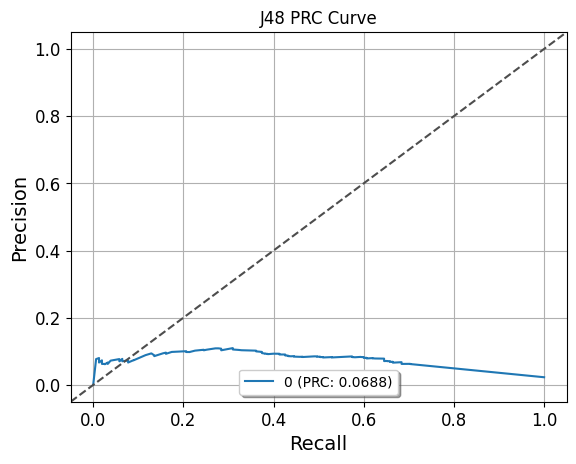


(process:12168): GLib-GIO-WARNING **: 13:04:46.925: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.719.200_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:12168): GLib-GIO-WARNING **: 13:04:47.753: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:12168): GLib-GIO-WARNING **: 13:04:47.773: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.49.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


'digraph J48Tree {\nN0 [label="attr2" ]\nN0->N1 [label="<= 89"]\nN1 [label="attr2" ]\nN1->N2 [label="<= 35"]\nN2 [label="attr1" ]\nN2->N3 [label="<= 10"]\nN3 [label="attr2" ]\nN3->N4 [label="<= 12"]\nN4 [label="attr1" ]\nN4->N5 [label="<= 7"]\nN5 [label="5 (17.0/1.0)" shape=box style=filled ]\nN4->N6 [label="> 7"]\nN6 [label="attr1" ]\nN6->N7 [label="<= 8"]\nN7 [label="3 (3.0)" shape=box style=filled ]\nN6->N8 [label="> 8"]\nN8 [label="attr2" ]\nN8->N9 [label="<= 8"]\nN9 [label="3 (3.0/1.0)" shape=box style=filled ]\nN8->N10 [label="> 8"]\nN10 [label="5 (8.0/2.0)" shape=box style=filled ]\nN3->N11 [label="> 12"]\nN11 [label="3 (6.0)" shape=box style=filled ]\nN2->N12 [label="> 10"]\nN12 [label="attr1" ]\nN12->N13 [label="<= 40"]\nN13 [label="attr2" ]\nN13->N14 [label="<= 23"]\nN14 [label="attr1" ]\nN14->N15 [label="<= 24"]\nN15 [label="attr2" ]\nN15->N16 [label="<= 13"]\nN16 [label="attr1" ]\nN16->N17 [label="<= 11"]\nN17 [label="4 (3.0/1.0)" shape=box style=filled ]\nN16->N18 [label="

In [37]:
j48_options = ["-M", "3"]
run_j48_tree(j48_options)

# Controlling the leaf nodes to 5

Accuracy: 37.80%
True Positive Rate: 0.59
False Positive Rate: 0.25
Precision: 0.41
Recall: 0.59
F-Measure: 0.49
ROC Area: 0.76


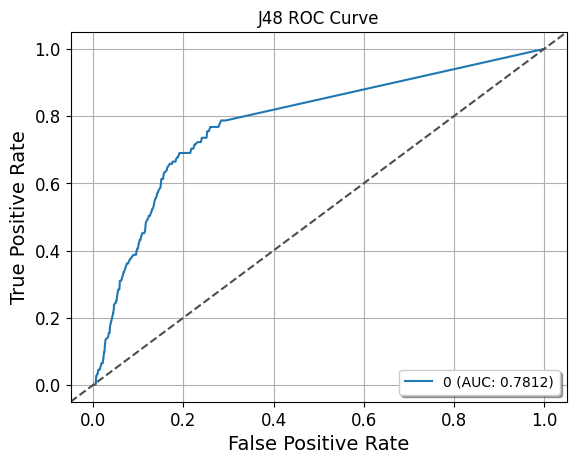

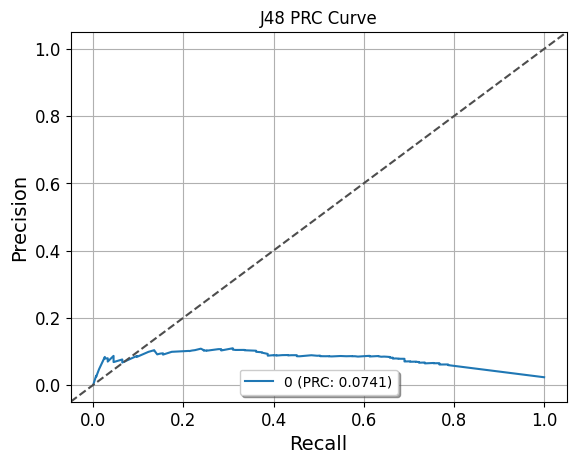


(process:4220): GLib-GIO-WARNING **: 13:05:56.278: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.719.200_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs


'digraph J48Tree {\nN0 [label="attr2" ]\nN0->N1 [label="<= 89"]\nN1 [label="attr2" ]\nN1->N2 [label="<= 35"]\nN2 [label="attr1" ]\nN2->N3 [label="<= 10"]\nN3 [label="attr2" ]\nN3->N4 [label="<= 12"]\nN4 [label="attr1" ]\nN4->N5 [label="<= 7"]\nN5 [label="5 (17.0/1.0)" shape=box style=filled ]\nN4->N6 [label="> 7"]\nN6 [label="attr2" ]\nN6->N7 [label="<= 8"]\nN7 [label="3 (5.0/1.0)" shape=box style=filled ]\nN6->N8 [label="> 8"]\nN8 [label="5 (9.0/3.0)" shape=box style=filled ]\nN3->N9 [label="> 12"]\nN9 [label="3 (6.0)" shape=box style=filled ]\nN2->N10 [label="> 10"]\nN10 [label="attr1" ]\nN10->N11 [label="<= 40"]\nN11 [label="attr2" ]\nN11->N12 [label="<= 23"]\nN12 [label="attr1" ]\nN12->N13 [label="<= 24"]\nN13 [label="attr2" ]\nN13->N14 [label="<= 13"]\nN14 [label="3 (30.0/3.0)" shape=box style=filled ]\nN13->N15 [label="> 13"]\nN15 [label="attr1" ]\nN15->N16 [label="<= 19"]\nN16 [label="attr1" ]\nN16->N17 [label="<= 15"]\nN17 [label="attr2" ]\nN17->N18 [label="<= 20"]\nN18 [label=

In [38]:
j48_options = ["-M", "5"]
run_j48_tree(j48_options)

# Controlling the leaf nodes to 10

In [21]:
j48_options = ["-M", "10"]
run_j48_tree(j48_options)

Accuracy: 38.79%
True Positive Rate: 0.59
False Positive Rate: 0.24
Precision: 0.42
Recall: 0.59
F-Measure: 0.49
ROC Area: 0.77


# Plotting the Curves

Accuracy: 38.46%
True Positive Rate: 0.60
False Positive Rate: 0.24
Precision: 0.42
Recall: 0.60
F-Measure: 0.50
ROC Area: 0.76


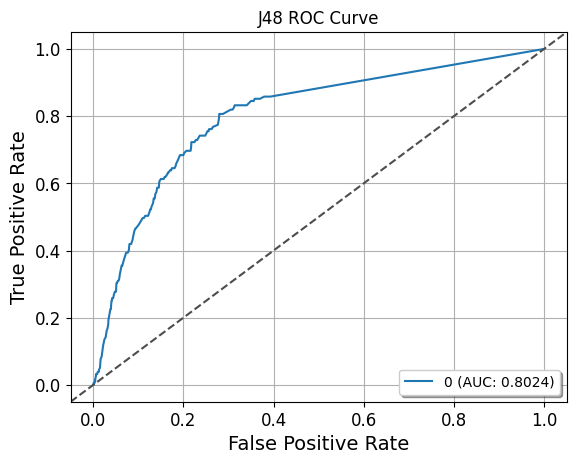

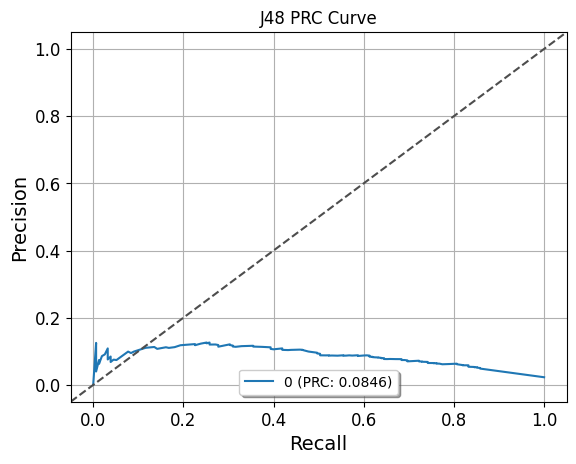

In [36]:
j48_options = ["-C", "0.1", "-M", "3"]
dot_tree = run_j48_tree(j48_options)

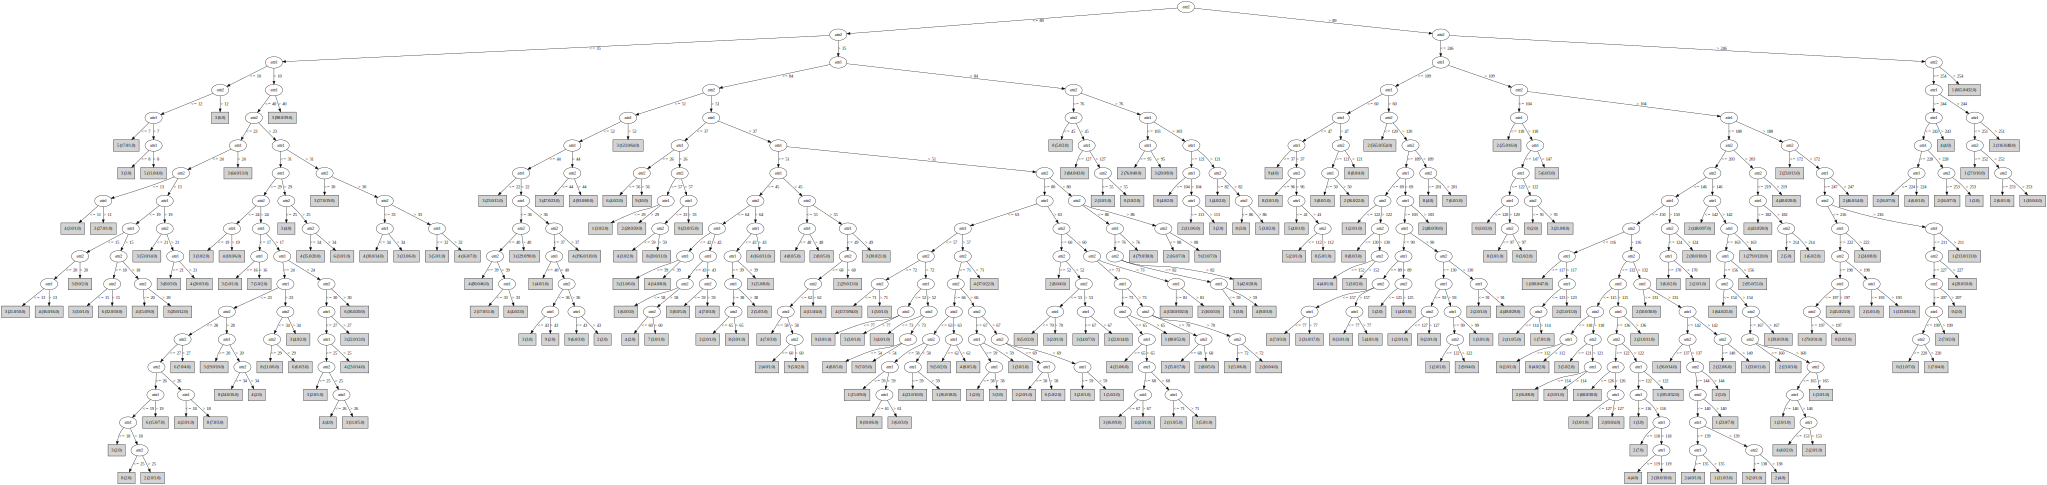

In [35]:

display(Source(dot_tree))

# Regularization Hyperparameters

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. 
Regularization hyperparameters for example can restrict the maximum depth of the Decision Tree.
This is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.



# Instability
Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation. 

on the next example, left, a Decision Tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. 

Other parameters that  restrict the shape of the Decision Tree: 


*   min_samples_split (the minimum number of sam‐ ples a node must have before it can be split)
*   min_samples_leaf (the minimum num‐ ber of samples a leaf node must have) 
*   min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
* max_leaf_nodes (maximum number of leaf nodes)
* max_features (maximum number of features that are evaluated for splitting at each node). 
# Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model; resulting in a smaller tree & reduced overfitting
